# 1. Los diferentes algoritmos de integración de ecuaciones diferenciales

Los métodos para resolver ecuaciones diferenciales que se describen a continuación, tienen como principal idea evaluar en un ciclo for la ecuación $y_n$ (distinta en cada método). Dando así como resultado una matriz en la que cada renglón $i$ tiene como entradas los valores obtenidos en i-ésima iteración.

In [4]:
from pylab import*
%matplotlib inline

## Integración con el método de Euler

#### Derivación

Su principal idea es que la gráfica de una función desconocida $f$ se puede aproximar con una poligonal. 

El punto inicial $(x_0,y_0=f(x_0))$, que pertenece a la gráfica de la función $f$, es el primer punto de la poligonal y en dicho punto vamos a evaluar la derivada $f'$ de nuestra función (ésta la conocemos pues precisamente nuestra ecuación diferencial nos está dando una expresión para ella), y por tanto podemos conocer la pendiente $m$ en ese punto: $\ \ m_0=f'(x_0)$.

Los demás puntos son obtenidos mediante un proceso iterativo: 

\begin{equation}
x_n=x_0+nh \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \dots (1) \\
y_n=f(x_n)=f(x_{n-1}+h) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \dots (2)
\end{equation}

Ahora bien, por Taylor a primer orden:

$$
f(x_{n-1}+h) \simeq f(x_{n-1})+hf'(x_{n-1})
$$

La función $f'$ es desconocida pero podemos aproximarla como una recta con pendiente $m_{n-1}=f'(x_{n-1})$ que tiene como dominio $[x_{n-1},x_{n}]$ y que pasa por el punto $x_{n-1}$.

De ésta manera, la gráfica de la función $f$ adopta la forma de una poligonal que tiene como vértices los puntos de la forma $(x_n,f(x_n))$.  La arista entre dos puntos $(x_n,y_n)$ y $(x_{n+1},y_{n+1})$ es una recta descrita por la ecuación: 

$$
f_{n}(z)=y_{n}+zm_{n} \ \ \ \ \ \ \ \ z \in [x_{n},x_{n+1}]
$$

En particular cuando $z=x_{n+1}$:

$$
y_{n+1}= f_{n}(x_{n+1})=y_{n}+x_{n+1}m_{n}=f(x_n)+x_{n+1}f'(x_n)=f(x_n)+hf'(x_n)
$$

Quedando entonces que las ecuaciones (1) y (2) se convierten en:

$$
x_n=x_0+nh \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \dots (3)\\
y_n=f(x_n)+hf'(x_n) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \dots (4)
$$

Las funciones que vamos a definir a continuación, hacen un proceso iterativo con la ecuación (4) mediante un ciclo for. Por otra parte, con la función arrange generan una partición del segmento [x[0],x[1]] con puntos que distan h entre sí, para obtener los puntos de la ecuación (3).

#### Código

In [5]:
def euler_1orden(ec,p_ini,x,h=0.1):
    #ec es la ecuación diferencial que queremos resolver. 
    #p_ini va a ser una lista con los valores iniciales
    #x va a ser una lista con el tiempo inicial y el tiempo final en los que vamos a iterar la función sol
    #h es el paso de tiempo
    
    tiempos = arange(x[0],x[1]+h,h)
    #arrange esta creando un vector con valores desde la primer coordenada del vector p_ini 
    #hasta t_final con distancias h.
    
    sol = zeros((len(tiempos),len(p_ini)))
    #estamos creando un array de ceros con tantos renglones como particiones h del intervalo [x[0],x[1]] 
    #y con el mismo número de columnas que de datos iniciales.
    
    sol[0,:]= p_ini
    #al anterior array le estamos añadiendo los datos iniciales como el primer renglón. 
    
    for i in range(len(tiempos)-1):
        sol[i+1,:] = sol[i,:] + h*ec(sol[i],tiempos[i])
    #el ciclo for está iterando la función del método de Euler
    #cada iteración i se va almacenando en renglón i del arreglo sol
    
    return tiempos,sol
    #la función da como resultado el arreglo tiempos y el arreglo sol.

## Integración sobre serie de Taylor a segundo orden

#### Derivación

En el método de Euler de primer orden escribimos la función mediante una serie de Taylor a primer orden, en éste caso, vamos a usar la serie de Taylor hasta orden 2:
$$
x_n=x_0+nh \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \dots (1) \\
y_n=f(x_n)=f(x_{n-1}+h) \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \dots (2)
$$

Por lo tanto, para la ecuación (2) utilizaremos la siguiente aproximación:

$$
f(x_{n-1}+h) \simeq f(x_{n-1})+hf'(x_{n-1})+\frac{h^2}{2!}f''(x_{n-1}) \ \ \ \ \ \ \ \ \ \ \ \dots (3)
$$

Ahora bien, como la ecuación diferencial $(f'(x)=g(x,y))$ es una expresión para la derivada de $f$, la segunda derivada de $f$ es de la forma:

$$
f''(x)=\frac{d}{dx}f'(x)=\frac{d}{dx}g(x,y)=\frac{\partial g(x,y)}{\partial x}+\frac{\partial g(x,y)}{\partial y}\frac{\partial y}{\partial x}=\frac{\partial f'(x)}{\partial x}+\frac{\partial f'(x)}{\partial y}f'(x)
$$

Entonces sustituyendo en (3) tenemos que:

$$
f(x_{n-1}+h) \simeq f(x_{n-1})+hf'(x_{n-1})+\frac{h^2}{2} \left( \frac{\partial f'(x_{n-1})}{\partial x} +\frac{\partial f'(x_{n-1})}{\partial y}f'(x_{n-1}) \right)
$$

Quedando que las ecuaciones (1) y (2) se convierten en:


$$
x_n=x_0+nh \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \dots (4)\\
y_n=f(x_n)+hf'(x_n)+ \frac{h^2}{2}\left( \frac{\partial f'(x_{n})}{\partial x} +\frac{\partial f'(x_{n})}{\partial y}f'(x_{n}) \right)\ \ \ \  \ \ \dots (5)
$$


Las funciones que vamos a definir a continuación, hacen un proceso iterativo con la ecuación (5) mediante un ciclo for. Por otra parte, con la función arrange generan una partición del segmento [x[0],x[1]] con puntos que distan h entre sí, para obtener los puntos de la ecuación (4).

#### Código

In [ ]:
def taylor(ec,d_ec,y_ini,x,h=0.1):
    if abs(x[1]-x[0])<=10.*h:
        h = abs(x[1]-x[0])/100
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(y_ini)))
    sol[0,:] = y_ini
    for i in xrange(len(tiempos)-1):
        f=ec(sol[i,:],tiempos[i])
        df,jac=d_ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(jac[0] + dot(jac[1],f)))
    return tiempos,sol

In [53]:
def euler_2orden(ec,d_ec,p_ini,x,h=0.1): 
    #ec es la ecuación diferencial que queremos resolver. Cuando es un sistema de ecuaciones, 
    #necesitamos escribir el vector con la información como un array.
    #d_ec es la derivada de ec, cuando tenemos un sistema de ecuaciones, toda la información de 
    #la derivada (una matriz) se escribe en forma de array.
    #p_ini va a ser una lista con los valores iniciales
    #x va a ser una lista con el tiempo inicial y el tiempo final en los que vamos a iterar la función sol
    #h es el paso de tiempo
    
    tiempos=arange(x[0],x[1]+h,h) 
    
    sol=zeros((len(tiempos),len(p_ini)))
    #estamos creando un array de ceros con tantos renglones como particiones h del intervalo [x[0],x[1]] 
    #y con el mismo número de columnas que de datos iniciales.
    
    sol[0,:]=p_ini
    #al anterior array le estamos añadiendo los datos iniciales como el primer renglón. 
    
    for i in xrange(len(tiempos)-1):
        f=ec(sol[i,:],tiempos[i])
        df,jac=d_ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(jac[0] + dot(jac[1],f)))          
    #el ciclo for está haciendo tres cosas
        #evaluar la ecuación original en los valores del renglón i para el tiempo i
        #evaluar la derivada de la ecuación en los valores del renglón i, en el tiempo i
        #iterar la función del método de Euler a 2do orden usando los valores que obtuvimos para df, jac y f
    #las primeras dos expresiones son argumentos necesarios para ir obteniendo los renglones del arreglo sol.
    #cada iteración i se va almacenando en renglón i del arreglo sol
              
    return tiempos,sol 
    #la función da como resultado el arreglo tiempos y el arreglo sol.

## Integración con el método de Runge-Kutta

### Segundo orden

#### Derivación

Éste método se basa en aproximar la gráfica de la función (y por lo tanto, la función) desconocida mediante una poligonal, sólo que en ésta ocasión la líneas entre dos puntos $(x_n,y_n)$ y $(x_{n+1},y_{n+1})$ no usa  como pendiente la derivada de la función evaluada en $(x_n,y_n)$, sino que evalúa la derivada en un punto intermedio del intervalo $(x_n+h/2,y_n+k/2)$:

$$
y_{n+1}=y_n+hg(x_n+\frac{h}{2},y_n+\frac{k}{2})
$$
Con $k=hg(x_n,y_n)$.

Para llegar a dicha expresión se hizo una expansión en serie de Taylor para la función $f$ que estamos buscando:

$$
f(x)=f(x_0)+f'(x_0)x+\frac{f''(x_0)}{2}x^2+ \dots  \ \ \ \ \ x \in [0,h]
$$

Al sustituir $f(x)$ por $y_n$ e integrar con respecto a x sobre un intervalo simétrico entre $x_n$ y $x_{n+1}$:

$$
y_{n+1}=y_n+ g(x_n,y_n)\int \limits_{-h/2}^{h/2}dx + g'(x_n,y_n) \int \limits_{-h/2}^{h/2} x dx 
$$

Se anula el último término, quedando:

$$
y_{n+1}=y_n+hg(x_n+\frac{h}{2},y_n+\frac{h}{2}f(x_n,y_n))
$$


#### Código

In [7]:
def runge_kutta2(ec,p_ini,x,h=0.1):
    #ec es la ecuación diferencial que queremos resolver. Cuando es un sistema de ecuaciones, 
    #necesitamos escribir el vector con la información como un array.
    #p_ini va a ser una lista con los valores iniciales
    #x va a ser una lista con el tiempo inicial y el tiempo final en los que vamos a iterar la función sol
    #h es el paso de tiempo
    
    tiempos = arange(x[0],x[1]+h,h)
    
    sol=zeros((len(tiempos),len(p_ini)))
    #estamos creando un array de ceros con tantos renglones como particiones h del intervalo [x[0],x[1]] 
    #y con el mismo número de columnas que de datos iniciales.
    
    sol[0,:]=p_ini
    #al anterior array le estamos añadiendo los datos iniciales como el primer renglón. 
    
    for i in xrange(len(tiempos)-1):
        k=h*ec(sol[i,:],tiempos[i])
        f=ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        sol[i+1,:]=sol[i,:]+h*f
    #las primeras dos expresiones son argumentos necesarios para ir obteniendo los renglones del arreglo sol.
    #cada iteración i se va almacenando en renglón i del arreglo sol
              
    return tiempos, sol
    #la función da como resultado el arreglo tiempos y el arreglo sol.

### Cuarto orden

#### Derivación

El método de integración de runge kutta de orden cuatro se basa en la misma idea de aproximar la gráfica de una función con una poligonal, sin embargo, la pendiente de la recta entre dos puntos de la gráfica ahora depende de un segundo punto medio obtenido con el método que se usa para runge kutta de segundo orden.

Ahora la ecuación es:

$$
y_{n+1}=y_n+\frac{h}{6}(k_1+2k_2+2k_3+k_4)
$$

Con $k_1=hf(x_n,y_n)$, $k_2=hf(x_n+1/2,y_n+1/2k_1h)$, $k_3=hf(x_n+1/2,y_n+1/2k_2h)$, $k_4=hf(x_n+h,y_n+k_3h)$.

#### Código

In [8]:
def runge_kutta4(ec,p_ini,x,h=0.1):
    #ec es la ecuación diferencial que queremos resolver. Cuando es un sistema de ecuaciones, 
    #necesitamos escribir el vector con la información como un array.
    #p_ini va a ser una lista con los valores iniciales
    #x va a ser una lista con el tiempo inicial y el tiempo final en los que vamos a iterar la función sol
    #h es el paso de tiempo
    
    tiempos = arange(x[0],x[1]+h,h)
    
    sol=zeros((len(tiempos),len(p_ini)))
    #estamos creando un array de ceros con tantos renglones como particiones h del intervalo [x[0],x[1]] 
    #y con el mismo número de columnas que de datos iniciales.
    
    sol[0,:]=p_ini
    #al anterior array le estamos añadiendo los datos iniciales como el primer renglón.
    
    for i in xrange(len(tiempos)-1):
        k1=ec(sol[i,:],tiempos[i])
        k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
        k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
        k4=ec(sol[i,:]+h*k3,tiempos[i]+h)
        sol[i+1,:]=sol[i,:]+(h/6.0)*(k1+2*k2+2*k3+k4)
    #las primeras dos expresiones son argumentos necesarios para ir obteniendo los renglones del arreglo sol.
    #cada iteración i se va almacenando en renglón i del arreglo sol
    
    return tiempos, sol
    #la función da como resultado el arreglo tiempos y el arreglo sol.

## Verificación de los integradores

Para probar los integradores vamos a usar la ecuación:

$$
\ddot{x}+0.5\dot{x}+\sin(x)=e^{-t}sin(3t)
$$

Renombrando:
$$
z_1=x  \ \ \ \ \ \Rightarrow \ \ \ \  \dot{z_1}=\dot{x}=z_2
$$ 
$$
z_2=\dot{x}  \ \ \ \ \ \Rightarrow \ \ \  \ \ \ \ \ \ \ \ \ \dot{z_2}=\ddot{x}
$$

Quedando entonces un sistema de ecuaciones:

$$
\dot{z_1}=z_2 \ \ \  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
$$
$$
\dot{z_2}=-0.5z_2-\sin(z_1)+e^{-t}sin(3t)
$$

In [9]:
def ec1(z,t):
    return array([z[1],-0.5*z[1]-sin(z[0])+e**(-t)*sin(3*t)])

In [36]:
def d_ec1(z,t):
    x1=array([0,exp(-t)*(3*cos(3*t)-sin(3*t))])
    x2=array([ [0, 1], [-cos(z[0]), -0.5] ])
    return x1,x2

#### Para euler 1er orden

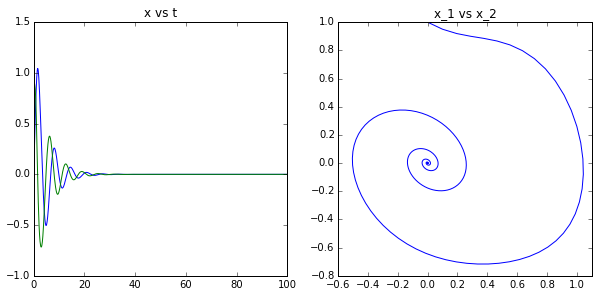

In [11]:
fig = plt.figure(figsize=(10,10))

xt = fig.add_subplot(221)
xx = fig.add_subplot(222)

xt.set_title("x vs t")
xx.set_title("x_1 vs x_2")

t,e1 = euler_1orden(ec1,[0,1],[0,100])
xlim([0,100])
ylim([-1,1.5])
xt.plot(t,e1)

xlim([-0.6,1.1])
ylim([-0.8,1])
xx.plot(e1[:,0],e1[:,1])

#### Para euler 2er orden

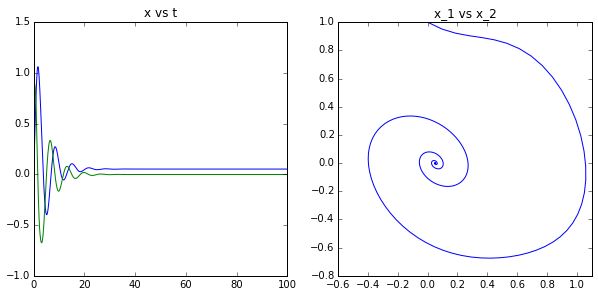

In [54]:
fig = plt.figure(figsize=(10,10))

xt = fig.add_subplot(221)
xx = fig.add_subplot(222)

xt.set_title("x vs t")
xx.set_title("x_1 vs x_2")

t,e2 = euler_2orden(ec1,d_ec1,[0,1],[0,100])
xlim([0,100])
ylim([-1,1.5])
xt.plot(t,e2)

xlim([-0.6,1.1])
ylim([-0.8,1])
xx.plot(e2[:,0],e2[:,1])

#### Para kunge kutta 2do orden

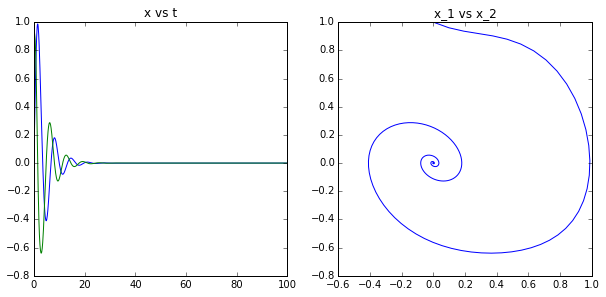

In [13]:
fig = plt.figure(figsize=(10,10))

xt = fig.add_subplot(221)
xx = fig.add_subplot(222)

xt.set_title("x vs t")
xx.set_title("x_1 vs x_2")

t,k2 = runge_kutta2(ec1,[0,1],[0,100])
xt.plot(t,k2)

xx.plot(k2[:,0],k2[:,1])

#### Para runge kutta 4to orden

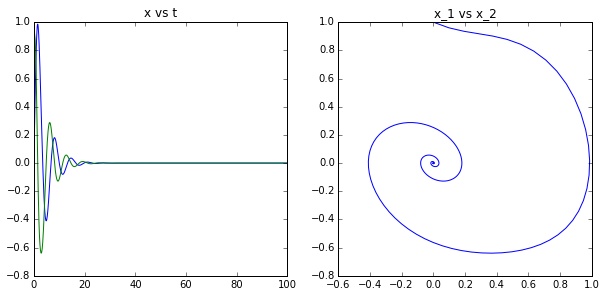

In [14]:
fig = plt.figure(figsize=(10,10))

xt = fig.add_subplot(221)
xx = fig.add_subplot(222)

xt.set_title("x vs t")
xx.set_title("x_1 vs x_2")

t,k4 = runge_kutta4(ec1,[0,1],[0,100])
xt.plot(t,k4)

xx.plot(k4[:,0],k4[:,1])

# 2. Encontrar el mejor paso de integración

La ecuación:

$$
\dddot{y}+\ddot{y}^2-3\dot{y}^3+cos^2(y)=e^{-t}\sin(3t)
$$

se puede reescribir con el siguiente cambio de variable:

$$
z_1=y \ \ \ \ \ \ \ \Rightarrow \ \ \ \ \ \ \dot{z_1}=\dot{y}=z_2
$$
$$
z_2=\dot{y} \ \ \ \ \ \ \ \Rightarrow \ \ \ \ \ \ \dot{z_2}=\ddot{y}=z_3
$$
$$
z_3=\ddot{y} \ \ \ \ \ \ \Rightarrow \ \ \ \ \ \ \ \ \ \ \ \ \ \dot{z_3}=\dddot{y}
$$



Quedando un sistema de ecuaciones de primer grado:

$$
\dot{z_1}=z_2
$$

$$
\dot{z_2}=\dot{y}=z_3
$$

$$
\dot{z_3} = - z_3^2 + 3z_2^3-\cos^2(z_1) + e^{-t}\sin(3t) 
$$

Que tiene como derivada:

$$
\ddot{z_1}=\dot{z_2}
$$

$$
\ddot{z_2}=\dot{z_3}
$$

$$
\ddot{z_3} = -2z_3(\dot{z_3})+9z_2^2(\dot{z_2})+2\sin(z_1)\cos(z_1)(\dot{z_1})-e^{-t}\sin(3t)+3e^{-t}cos(3t)
$$

Es decir:

$$
\ddot{z_1}=z_3
$$

$$
\ddot{z_2}= -z_3^2 + 3z_2^3-\cos^2(z_1) + e^{-t}\sin(3t) 
$$

$$
\ddot{z_3} = -2z_3[-z_3^2 + 3z_2^3-\cos^2(z_1) + e^{-t}\sin(3t)]+9z_2^2(z_3)+2(z_2)\sin(z_1)\cos(z_1)-e^{-t}\sin(3t)+3e^{-t}cos(3t)
$$

In [40]:
def ec_2 (z,t):
    d_z1=z[1]
    d_z2=z[2]
    d_z3=-z[2]**2+3*z[1]**3-cos(z[0])**2+e**(-t)*sin(3*t)
    return array([d_z1,d_z2,d_z3])

In [56]:
def d_ec_2 (z,t):
    d1=array([0,0,(3*cos(3*t)-sin(3*t))*exp(-t)])
    d2=array([[0,1,0], [0,0,1],[sin(2*z[0]),9*z[1]*z[1],-2*z[2]]])
    return d1,d2

#### Para euler 1er orden

/Users/Maria_Erandi/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/Maria_Erandi/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in cos
  from ipykernel import kernelapp as app


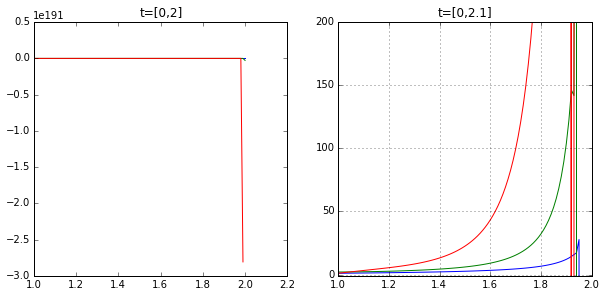

In [18]:
fig = plt.figure(figsize=(10,10))

a = fig.add_subplot(221)
b = fig.add_subplot(222)

a.set_title("t=[0,2]")
b.set_title("t=[0,2.1]")

t,a1 = euler_1orden(ec_2,[1.,2.,1.],[1.,2.0],0.01)
ylim([-1,200])
xlim([1,2])
grid(True)
a.plot(t,a1)

t,b1 = euler_1orden(ec_2,[1.,2.,1.],[1.,2.1],0.01)
ylim([-1,200])
xlim([1,2])
grid(True)
b.plot(t,b1)

#### Para euler 2do orden

/Users/Maria_Erandi/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in double_scalars
/Users/Maria_Erandi/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in cos
/Users/Maria_Erandi/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in sin
  app.launch_new_instance()


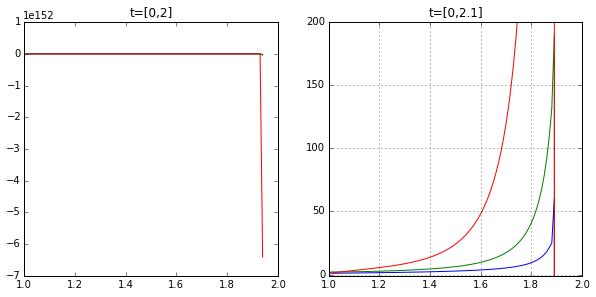

In [57]:
fig = plt.figure(figsize=(10,10))

a = fig.add_subplot(221)
b = fig.add_subplot(222)

a.set_title("t=[0,2]")
b.set_title("t=[0,2.1]")

t,a1 = euler_2orden(ec_2,d_ec_2,[1.,2.,1.],[1.,2.0],0.01)
ylim([-1,200])
xlim([1,2])
grid(True)
a.plot(t,a1)

t,b1 = euler_2orden(ec_2,d_ec_2,[1.,2.,1.],[1.,2.1],0.01)
ylim([-1,200])
xlim([1,2])
grid(True)
b.plot(t,b1)

#### Para runge kutta 2do orden

/Users/Maria_Erandi/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in double_scalars
/Users/Maria_Erandi/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in cos


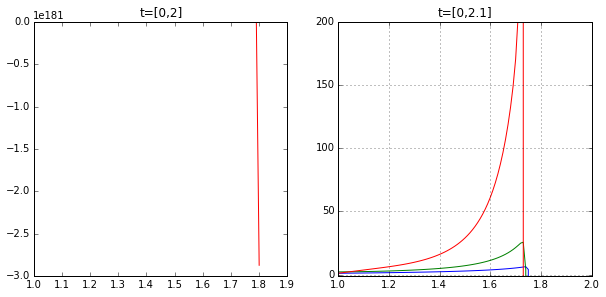

In [58]:
fig = plt.figure(figsize=(10,10))

a = fig.add_subplot(221)
b = fig.add_subplot(222)

a.set_title("t=[0,2]")
b.set_title("t=[0,2.1]")

t,a1 = runge_kutta2(ec_2,[1.,2.,1.],[1.,2],0.01)
ylim([-1,200])
xlim([1,2])
grid(True)
a.plot(t,a1)

t,b1 = runge_kutta2(ec_2,[1.,2.1,1.],[1.,2],0.01)
ylim([-1,200])
xlim([1,2])
grid(True)
b.plot(t,b1)

#### Para runge kutta 4to orden

/Users/Maria_Erandi/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in double_scalars
/Users/Maria_Erandi/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in cos


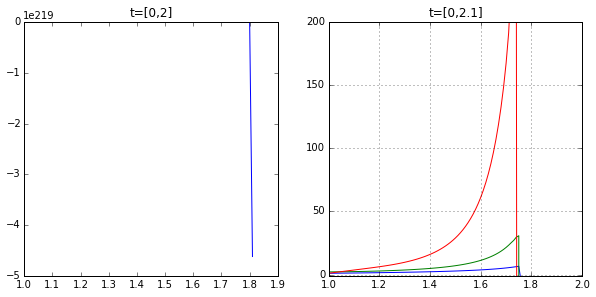

In [61]:
fig = plt.figure(figsize=(10,10))

a = fig.add_subplot(221)
b = fig.add_subplot(222)

a.set_title("t=[0,2]")
b.set_title("t=[0,2.1]")

t,a1 = runge_kutta4(ec_2,[1.,2.,1.],[1.,2],0.01)
ylim([-1,200])
xlim([1,2])
grid(True)
a.plot(t,a1)

t,b1 = runge_kutta4(ec_2,[1.,2.1,1.],[1.,2],0.01)
ylim([-1,200])
xlim([1,2])
grid(True)
b.plot(t,b1)

En todos los casos se muestra que los integradores son capaces de aproximar mejor la función si los límites del intervalo de integración no caen justo en la discontinuidad.

# 3. Integradores con argumentos opcionales

Ahora la ecuación diferencial es:

$$
\ddot{x}+\frac{1}{10}\dot{x}+4\sin(x)=\frac{1}{2}\sin(\omega t)
$$

Nuevamente, usando un cambio de variable se cambiará la ec. de segundo orden a un sistema de ecuaciones del primer orden:

$$
z_1=x \ \ \ \ \Rightarrow \ \ \ \ \dot{z_1}=\dot{x}
$$
$$
z_2=\dot{x} \ \ \ \ \Rightarrow \ \ \ \ \dot{z_2}=\ddot{x}
$$

Quedando el sistema como:

$$
\dot{z_1}=z_2
$$

$$
\dot{z_2}=-\frac{1}{10}z_2-4\sin(z_1)+\frac{1}{2}\sin(\omega t)
$$

In [69]:
def ec_4(z,t,omega):
        return array([z[1],-0.1*z[1]-4*sin(z[0])+0.5*sin(omega*t)])

In [85]:
def d_ec_4(z,t,omega):
    z1=array([0, 0.5*omega[0]*cos(omega[0]*t)])
    z2=array([[0,1],[-4*cos(x[0]),-0.1]])
    return z1,z2

#### Las ecuaciones modificadas

In [79]:
def euler_1modificado(ec,p_ini,x,omega,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    for i in range(len(sol)-1):
        sol[i+1,:] = sol[i]+h*ec(sol[i,:],tiempos[i],omega)
    return tiempos,sol

In [90]:
def euler_2modificado(ec,d_ec,p_ini,x,omega,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    for i in xrange(len(tiempos)-1):
        f = ec(sol[i,:],tiempos[i],omega)
        df,jac =d_ec(sol[i,:],tiempos[i],omega)
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(dt+dot(jac,f)))
    return tiempos,sol

In [65]:
def runge_k2modificado(ec,p_ini,x,omega,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): 
        k = h*ec(sol[i,:],tiempos[i],omega)
        f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h,omega)
        sol[i+1,:] = sol[i,:]+h*f
    return tiempos,sol

In [120]:
def runge_k4modificado(ec, p_ini,x,omega,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): 
        k1 = ec(sol[i,:],tiempos[i],omega)
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,omega)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,omega)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,omega)
        sol[i+1,:] = sol[i,:] + h*(k1+2*k2+2*k3+k4)/6
    return tiempos,sol

Para euler1

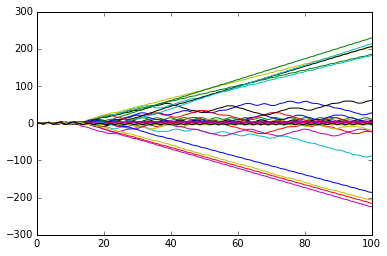

In [94]:
omegas=arange(1,3+.1,0.1)
for w in omegas:
    t_w,e1sol_w=euler_1modificado(ec_4,[0,1],[0,100],w,h=0.1)
    plot(t_w,e1sol_w)

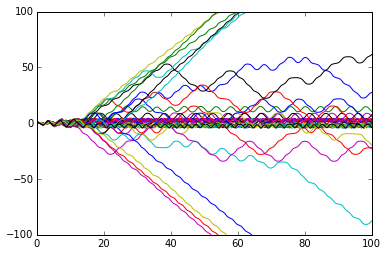

In [112]:
omegas=arange(1,3+.1,0.1)
for w in omegas:
    t_w,e1sol_w=euler_1modificado(ec_4,[0,1],[0,100],w,h=0.1)
    ylim(-100,100)
    plot(t_w,e1sol_w)

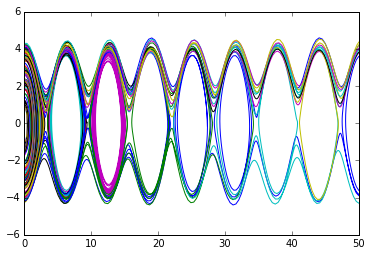

In [101]:
omegas=arange(1,3+.1,0.1)
for w in omegas:
    t_w,e1sol_w=euler_1modificado(ec_4,[0,1],[0,100],w,h=0.1)
    xlim(0,50)
    plot(e1sol_w[:,0],e1sol_w[:,1])

runge kutta2

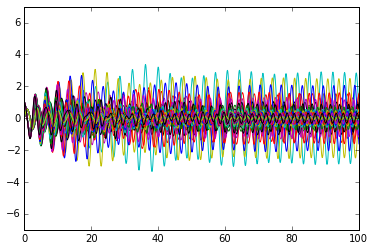

In [115]:
omegas=arange(1,3+.1,0.1)
for w in omegas:
    t_w,sol_w=runge_k2modificado(ec_4,[0,1],[0,100],w)
    ylim(-7,7)
    plot(t_w,sol_w)

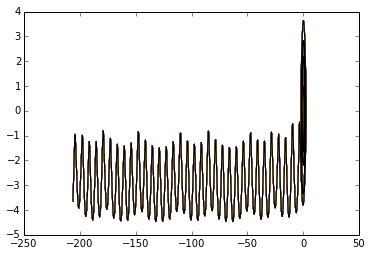

In [116]:
omegas=arange(1,3+.1,0.1)
for w in omegas:
    t_w,sol_w=runge_k2modificado(ec_4,[0,1],[0,100],w)
    plot(e1sol_w[:,0],e1sol_w[:,1])

runge kutta4

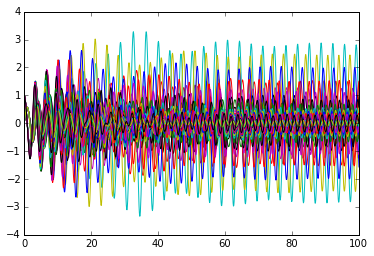

In [121]:
omegas=arange(1,3+.1,0.1)
for w in omegas:
    t_w,sol_w=runge_k4modificado(ec_4,[0,1],[0,100],w)
    plot(t_w,sol_w)

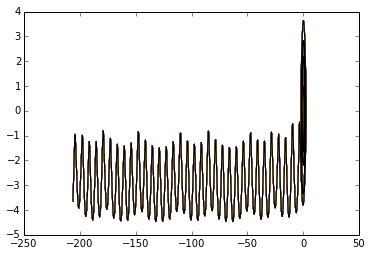

In [122]:
omegas=arange(1,3+.1,0.1)
for w in omegas:
    t_w,sol_w=runge_k4modificado(ec_4,[0,1],[0,100],w)
    plot(e1sol_w[:,0],e1sol_w[:,1])

# 4. Las ecuaciones de Lorentz

Vamos a redefinir el siguiente sistema de ecuaciones:

$$
\dot{x}=10(y-x)
$$

$$
\dot{y}=x(28-z)-y
$$

$$
\dot{z}=xy-\frac{8}{3}z
$$

Mediante un vector $\vec{x}$ tal que:

$$
\vec{x}=(x,y,z)
$$

In [ ]:
def lorentz(x,t):
    return array([10*x[1]-10*x[0],x[0]*(28-x[2])-x[1],x[0]*x[1]-8*x[2]/3])

Utilizando runge kutta de orden cuatro, obtenemos que:

#### Plano XY

In [ ]:
fig = plt.figure(figsize=(10,10))

a = fig.add_subplot(221)
b = fig.add_subplot(222)

a.set_title("p_ini=[-1,-1,-1]")
b.set_title("p_ini=[5,5,5]")

t,lor1 = runge_kutta4(lorentz,[-1.,-1.,-1.],[0.,100],0.01)
t,lor2 = runge_kutta4(lorentz,[5.,5.,5.],[0.,100],0.01)

a.plot(lor1[:,0],lor1[:,1])
b.plot(lor2[:,0],lor2[:,1])

#### Plano YZ

In [ ]:
fig = plt.figure(figsize=(10,10))

c = fig.add_subplot(223)
d = fig.add_subplot(224)

c.set_title("p_ini=[-1,-1,-1]")
d.set_title("p_ini=[5,5,5]")

t,lor1 = runge_kutta4(lorentz,[-1.,-1.,-1.],[0.,100],0.01)
t,lor2 = runge_kutta4(lorentz,[5.,5.,5.],[0.,100],0.01)

c.plot(lor1[:,1],lor1[:,2])
d.plot(lor2[:,1],lor2[:,2])

#### Plano ZX

In [ ]:
fig = plt.figure(figsize=(10,10))

e = fig.add_subplot(221)
f = fig.add_subplot(222)

e.set_title("p_ini=[-1,-1,-1]")
f.set_title("p_ini=[5,5,5]")

t,lor1 = runge_kutta4(lorentz,[-1.,-1.,-1.],[0.,100],0.01)
t,lor2 = runge_kutta4(lorentz,[5.,5.,5.],[0.,100],0.01)

e.plot(lor1[:,2],lor1[:,0])
f.plot(lor2[:,2],lor2[:,0])

Para valores en los extremos de los valores iniciales [5,5,5] el atractor de lorentz tiene los dos huecos más anchos. Mientras que para valores iniciales iguales a [-1,-1,-1] uno de los huecos (en la gráfica del plano YZ puede apreciarse que es el de la derecha) disminuye de tamaño. 

In [ ]:
fig = plt.figure(figsize=(10,10))

e = fig.add_subplot(221)
f = fig.add_subplot(222)

e.set_title("p_ini=[2,-2,-2]")
f.set_title("p_ini=[2,-2.01,-2]")

t,lor1 = runge_kutta4(lorentz,[2.,-2.,-2.],[0.,100],0.01)
t,lor2 = runge_kutta4(lorentz,[2.,-2.01,2.],[0.,100],0.01)

xlim([-30,30])
ylim([0,50])

e.plot(lor1[:,1],lor1[:,2])
f.plot(lor2[:,1],lor2[:,2])

Cuando se modifica por una centécima la condición inicial de $y$, cambia la densidad de las trayectorias en la gráfica.